In [308]:
import os
import numpy as np
import imageio
import glob
import matplotlib.pyplot as plt

In [2]:
images_path = glob.glob("/home/previato/images/*.png")

In [311]:
images = {}
for img in images_path:
     images[os.path.split(img)[1]] = imageio.imread(img)

In [312]:
images

{'baboon.png': Array([[[164, 150,  71],
         [ 63,  57,  31],
         [ 75,  43,  10],
         ...,
         [117, 119,  68],
         [141, 170, 101],
         [179, 188, 118]],
 
        [[120, 125,  62],
         [135,  97,  33],
         [ 55,  35,  23],
         ...,
         [122, 140,  98],
         [136, 159, 128],
         [120, 138,  74]],
 
        [[ 99,  74,  31],
         [132, 118,  46],
         [ 60,  41,  36],
         ...,
         [118,  93,  90],
         [ 87,  91,  77],
         [ 96,  80,  49]],
 
        ...,
 
        [[121, 148, 155],
         [123, 156, 150],
         [124, 150, 139],
         ...,
         [110,  73,  60],
         [ 90,  93,  70],
         [ 81,  80,  60]],
 
        [[126, 169, 168],
         [117, 151, 151],
         [121, 136, 133],
         ...,
         [ 73,  84,  68],
         [ 99,  69,  86],
         [ 80,  63,  71]],
 
        [[  9,  11,  12],
         [ 10,  12,  11],
         [ 11,  15,  12],
         ...,
         [  5,

In [4]:
imageio.imread(images_path[0]).dtype

dtype('uint8')

In [5]:
r_h = np.histogram(images_list[0][:, :, 0], 255)
g_h = np.histogram(images_list[0][:, :, 1], 255)
b_h = np.histogram(images_list[0][:, :, 2], 255)

In [6]:
red_colors = np.linspace((0.0, 0.0, 0.0), (1.0, 0.0, 0.0), 256)
green_colors = np.linspace((0.0, 0.0, 0.0), (0.0, 1.0, 0.0), 256)
blue_colors = np.linspace((0.0, 0.0, 0.0), (0.0, 0.0, 1.0), 256)

<BarContainer object of 256 artists>

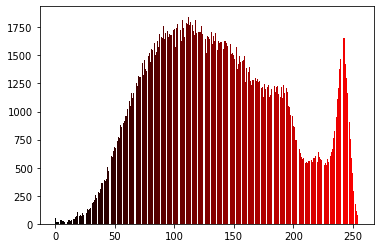

In [7]:
fig, ax = plt.subplots()
plt.bar(r_h[1], np.append(r_h[0], 0), color=red_colors)

<BarContainer object of 256 artists>

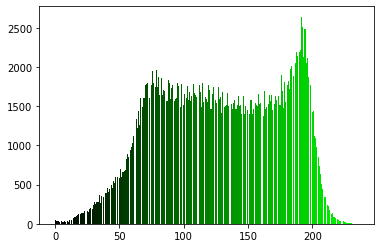

In [8]:
fig, ax = plt.subplots()
plt.bar(g_h[1], np.append(g_h[0], 0), color=green_colors)

<BarContainer object of 256 artists>

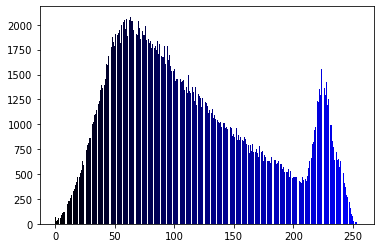

In [9]:
fig, ax = plt.subplots()
plt.bar(b_h[1], np.append(b_h[0], 0), color=blue_colors)

In [10]:
kernel_floyd_steinberg = np.array([
    [0, 0, 7/16],
    [3/16, 5/16, 1/16]
])

In [11]:
kernel_stevenson_arce = np.array([
    [0, 0, 0, 0, 0, 32/200, 0],
    [12/200, 0, 26/200, 0, 30/200, 0, 16/200],
    [0, 12/200, 0, 26/200, 0, 12/200, 0],
    [5/200, 0, 12/200, 0, 12/200, 0, 5/200]
])

In [12]:
kernel_burkes = np.array([
    [0, 0, 0, 8/32, 4/32],
    [2/32, 4/32, 8/32, 4/32, 2/32]
])

In [13]:
kernel_sierra = np.array([
    [0, 0, 0, 5/32, 3/32],
    [2/32, 4/32, 5/32, 4/32, 2/32],
    [0, 2/32, 3/32, 2/32, 0]
])

In [14]:
kernel_stucki = np.array([
    [0, 0, 0, 8/42, 4/42],
    [2/42, 4/42, 8/42, 4/42, 2/42],
    [1/42, 2/42, 4/42, 2/42, 1/42]
])

In [15]:
kernel_jarvis_judice_ninke = np.array([
    [0, 0, 0, 7/48, 5/48],
    [3/48, 5/48, 7/48, 5/48, 3/48],
    [1/48, 3/48, 5/48, 3/48, 1/48]
])

In [34]:
images_list[0].shape

(512, 512, 3)

In [17]:
images_list[0][0, 1, 1]

57

In [18]:
images_list[0]

Array([[[164, 150,  71],
        [ 63,  57,  31],
        [ 75,  43,  10],
        ...,
        [117, 119,  68],
        [141, 170, 101],
        [179, 188, 118]],

       [[120, 125,  62],
        [135,  97,  33],
        [ 55,  35,  23],
        ...,
        [122, 140,  98],
        [136, 159, 128],
        [120, 138,  74]],

       [[ 99,  74,  31],
        [132, 118,  46],
        [ 60,  41,  36],
        ...,
        [118,  93,  90],
        [ 87,  91,  77],
        [ 96,  80,  49]],

       ...,

       [[121, 148, 155],
        [123, 156, 150],
        [124, 150, 139],
        ...,
        [110,  73,  60],
        [ 90,  93,  70],
        [ 81,  80,  60]],

       [[126, 169, 168],
        [117, 151, 151],
        [121, 136, 133],
        ...,
        [ 73,  84,  68],
        [ 99,  69,  86],
        [ 80,  63,  71]],

       [[  9,  11,  12],
        [ 10,  12,  11],
        [ 11,  15,  12],
        ...,
        [  5,   8,   5],
        [  2,   5,   0],
        [  4,   5,   2]]

In [284]:
def floyd_steinberg(image, error, i, j, b=1):
    if (i >= image.shape[0] - 1 or j == 0 or j >= image.shape[1] - 2):
        return
    
    image[i, j + 1, :] += 7/16.0*error
    image[i + 1, j - 1 * b, :] += 3/16.0*error
    image[i + 1, j, :] += 5/16.0*error
    image[i + 1, j + 1 * b, :] += 1/16.0*error

    
def stevenson_arce(image, error, i, j, b=1):
    if (i >= image.shape[0] - 3 or j <= 2 or j >= image.shape[1] - 4):
        return
    
    image[i, j + 2, :] += 32/200.0*error
    
    image[i + 1, j - 3 * b, :] += 12/200.0*error
    image[i + 1, j - 1 * b, :] += 26/200.0*error
    image[i + 1, j + 1 * b, :] += 30/200.0*error
    image[i + 1, j + 3 * b, :] += 16/200.0*error
    
    image[i + 2, j - 2 * b, :] += 12/200.0*error
    image[i + 2, j, :] += 26/200.0*error
    image[i + 2, j + 2 * b, :] += 12/200.0*error
    
    image[i + 3, j - 3 * b, :] += 5/200.0*error
    image[i + 3, j - 1 * b, :] += 12/200.0*error
    image[i + 3, j + 1 * b, :] += 12/200.0*error
    image[i + 3, j + 3 * b, :] += 5/200.0*error


def burkes(image, error, i, j, b=1):
    if (i >= image.shape[0] - 1 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1 * b, :] += 8/32.0*error
    image[i, j + 2 * b, :] += 4/32.0*error
    
    image[i + 1, j - 2 * b, :] += 2/32.0*error
    image[i + 1, j - 1 * b, :] += 4/32.0*error
    image[i + 1, j, :] += 8/32.0*error
    image[i + 1, j + 1 * b, :] += 4/32.0*error
    image[i + 1, j + 2 * b, :] += 2/32.0*error
    
    
def sierra(image, error, i, j, b=1):
    if (i >= image.shape[0] - 2 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1, :] += 5/32.0*error
    image[i, j + 2, :] += 3/32.0*error
    
    image[i + 1, j - 2 * b, :] += 2/32.0*error
    image[i + 1, j - 1 * b, :] += 4/32.0*error
    image[i + 1, j, :] += 5/32.0*error
    image[i + 1, j + 1 * b, :] += 4/32.0*error
    image[i + 1, j + 2 * b, :] += 2/32.0*error
    
    image[i + 2, j - 1 * b, :] += 2/32.0*error
    image[i + 2, j, :] += 3/32.0*error
    image[i + 2, j + 1 * b, :] += 2/32.0*error
    

def stucki(image, error, i, j, b=1):
    if (i >= image.shape[0] - 2 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1 * b, :] += 8/42.0*error
    image[i, j + 2 * b, :] += 4/42.0*error
    
    image[i + 1, j - 2 * b, :] += 2/42.0*error
    image[i + 1, j - 1 * b, :] += 4/42.0*error
    image[i + 1, j, :] += 8/42.0*error
    image[i + 1, j + 1 * b, :] += 4/42.0*error
    image[i + 1, j + 2 * b, :] += 2/42.0*error
    
    image[i + 2, j - 2 * b, :] += 1/42.0*error
    image[i + 2, j - 1 * b, :] += 2/42.0*error
    image[i + 2, j, :] += 4/42.0*error
    image[i + 2, j + 1 * b, :] += 2/42.0*error
    image[i + 2, j + 2 * b, :] += 1/42.0*error
    

def jarvis_judice_ninke(image, error, i, j, b=1):
    if (i >= image.shape[0] - 2 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1 * b, :] += 7/48.0*error
    image[i, j + 2 * b, :] += 5/48.0*error
    
    image[i + 1, j - 2 * b, :] += 3/48.0*error
    image[i + 1, j - 1 * b, :] += 5/48.0*error
    image[i + 1, j, :] += 7/48.0*error
    image[i + 1, j + 1 * b, :] += 5/48.0*error
    image[i + 1, j + 2 * b, :] += 3/48.0*error
    
    image[i + 2, j - 2 * b, :] += 1/48.0*error
    image[i + 2, j - 1 * b, :] += 3/48.0*error
    image[i + 2, j, :] += 5/48.0*error
    image[i + 2, j + 1 * b, :] += 3/48.0*error
    image[i + 2, j + 2 * b, :] += 1/48.0*error


In [316]:
def left_right_scan(image, dither_func):
    print(dither_func)
    dithering_image = np.copy(image)
    
    for i in range(dithering_image.shape[0]):
        for j in range(dithering_image.shape[1]):
            old_pixel = np.copy(dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] < 128, 0, 255)
            error = old_pixel - dithering_image[i, j, :]
            
            dither_func(dithering_image, error, i, j)
        
    return dithering_image

def left_right_left_scan(image, dither_func):
    dithering_image = np.copy(image)
    
    backwards = 1
    for i in range(dithering_image.shape[0]):
        for j in range(dithering_image.shape[1]):
            old_pixel = np.copy(dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] < 128, 0, 255)
            error = old_pixel - dithering_image[i, j, :]

            dither_func(dithering_image, error, i, j, backwards)
        backwards *= -1
        
    return dithering_image
                

In [358]:
def left_right_left_scan_4(image, dither_func):
    dithering_image = np.copy(image)
    
    backwards = 1
    for i in range(dithering_image.shape[0]):
        for j in range(dithering_image.shape[1]):
            old_pixel = np.copy(dithering_image[i, j, :])
            
#             print((dithering_image[i, j, :] > 128) & (dithering_image[i, j, :] <= 192))
                
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] > 192 , 255, dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where((dithering_image[i, j, :] > 128) & (dithering_image[i, j, :] <= 192), 170, dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where((dithering_image[i, j, :] > 64) & (dithering_image[i, j, :] <= 128), 85, dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] <= 64 , 0, dithering_image[i, j, :])
            
#             dithering_image[(dithering_image > 192)] = 255
#             dithering_image[(dithering_image > 128) & (dithering_image <= 192)] = 170
#             dithering_image[(dithering_image > 64) & (dithering_image <= 128)] = 85
#             dithering_image[(dithering_image <= 64)] = 0
            
            error = old_pixel - dithering_image[i, j, :]

            dither_func(dithering_image, error, i, j, backwards)
        backwards *= -1

    return dithering_image

In [317]:
getattr(, 'floyd_steinberg')

SyntaxError: invalid syntax (<ipython-input-317-6d546794f108>, line 1)

In [318]:
globals()['floyd_steinberg']

<function __main__.floyd_steinberg(image, error, i, j, b=1)>

In [321]:
import imageio

scan_methods = ['floyd_steinberg', 'stevenson_arce', 'burkes', 'sierra', 'stucki', 'jarvis_judice_ninke']
output_images = {}

for method in scan_methods:
    for image_name, image in images.items():
#         output_images[method][image_name]['left_right'] = left_right_scan(image, globals()[method])
#         output_images[method][image_name]['left_right_left'] = left_right_left_scan(image, globals()[method])
        left_right_image = left_right_scan(image.astype('float64'), globals()[method])
        left_right_image = np.clip(left_right_image, 0, 255).astype('uint8')
        
        left_right_left_image = left_right_left_scan(image.astype('float64'), globals()[method])
        left_right_left_image = np.clip(left_right_left_image, 0, 255).astype('uint8')
        
        imageio.imwrite('outputs/' + method + '-left_right-' + image_name, left_right_image)
        imageio.imwrite('outputs/' + method + '-left_right-left-' + image_name, left_right_left_image)

<function floyd_steinberg at 0x7fb3ba7859d8>
<function floyd_steinberg at 0x7fb3ba7859d8>
<function floyd_steinberg at 0x7fb3ba7859d8>
<function floyd_steinberg at 0x7fb3ba7859d8>
<function stevenson_arce at 0x7fb3ba785b70>
<function stevenson_arce at 0x7fb3ba785b70>
<function stevenson_arce at 0x7fb3ba785b70>
<function stevenson_arce at 0x7fb3ba785b70>
<function burkes at 0x7fb3ba785840>
<function burkes at 0x7fb3ba785840>
<function burkes at 0x7fb3ba785840>
<function burkes at 0x7fb3ba785840>
<function sierra at 0x7fb3ba7856a8>
<function sierra at 0x7fb3ba7856a8>
<function sierra at 0x7fb3ba7856a8>
<function sierra at 0x7fb3ba7856a8>
<function stucki at 0x7fb3ba785d90>
<function stucki at 0x7fb3ba785d90>
<function stucki at 0x7fb3ba785d90>
<function stucki at 0x7fb3ba785d90>
<function jarvis_judice_ninke at 0x7fb3ba785f28>
<function jarvis_judice_ninke at 0x7fb3ba785f28>
<function jarvis_judice_ninke at 0x7fb3ba785f28>
<function jarvis_judice_ninke at 0x7fb3ba785f28>


In [362]:
import time
img = np.copy(images_list[3]).astype('float32')

start = time.time()
ret_img = left_right_left_scan_4(img, floyd_steinberg)
print("Non vec:", time.time() - start)

ret_img = ret_img.clip(0, 255).astype('uint8')

# oimg = np.copy(images_list[2]).astype('float32')

# start = time.time()
# ret_img = left_right_scan(oimg, stevenson_arce)
# print("Non vec:", time.time() - start)

# oimg = img.clip(0, 255).astype('uint8')

Non vec: 31.25448727607727


In [ ]:
from scipy.signal import convolve2d

new_R = np.clip(convolve2d(images_list[0][:, :, 0], kernel_floyd_steinberg).astype('uint8'), 0, 255)
new_G = np.clip(convolve2d(images_list[0][:, :, 1], kernel_floyd_steinberg).astype('uint8'), 0, 255)
new_B = np.clip(convolve2d(images_list[0][:, :, 2], kernel_floyd_steinberg).astype('uint8'), 0, 255)

In [ ]:
new_r_h = np.histogram(new_R, 255)
new_g_h = np.histogram(new_G, 255)
new_b_h = np.histogram(new_B, 255)

In [ ]:
fig, ax = plt.subplots()
plt.bar(new_r_h[1], np.append(new_r_h[0], 0), color=red_colors)

In [ ]:
fig, ax = plt.subplots()
plt.bar(new_g_h[1], np.append(new_g_h[0], 0), color=green_colors)

In [ ]:
fig, ax = plt.subplots()
plt.bar(new_b_h[1], np.append(new_b_h[0], 0), color=blue_colors)

In [ ]:
print(np.mean(r_h[0]), np.mean(g_h[0]), np.mean(b_h[0]))

In [ ]:
print(np.std(r_h[0]), np.std(g_h[0]), np.std(b_h[0]))

In [ ]:
print(np.mean(new_r_h[0]), np.mean(new_g_h[0]), np.mean(new_b_h[0]))

In [ ]:
print(np.std(new_r_h[0]), np.std(new_g_h[0]), np.std(new_b_h[0]))

In [ ]:
import IPython.display
import PIL.Image
PIL.Image.fromarray(images_list[0][:, :, 0])

In [ ]:
new_image = np.stack((new_R, new_G, new_B), axis=2)

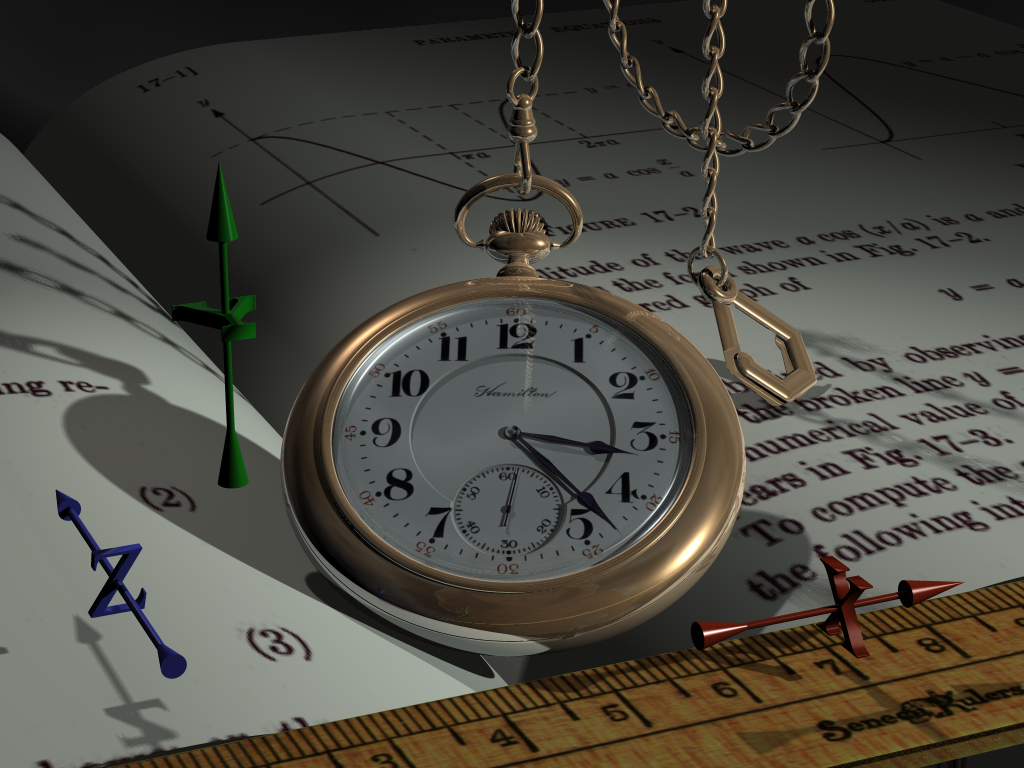

In [364]:
import IPython.display
import PIL.Image
PIL.Image.fromarray(images_list[3])

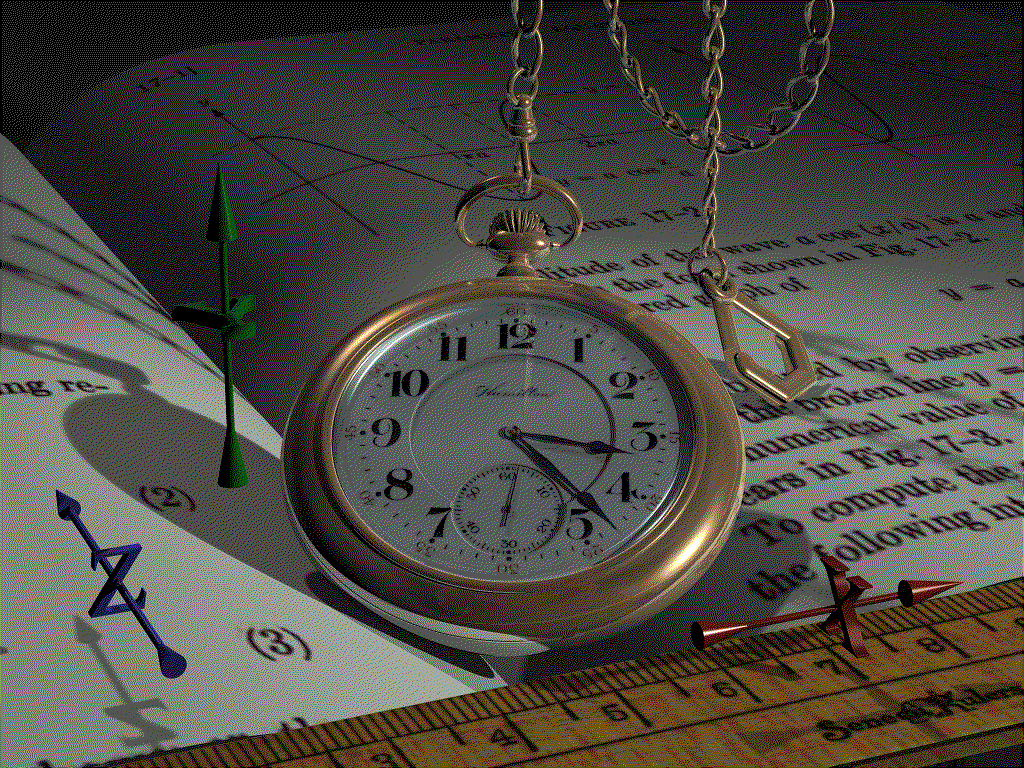

In [363]:
import IPython.display
import PIL.Image
PIL.Image.fromarray(ret_img)

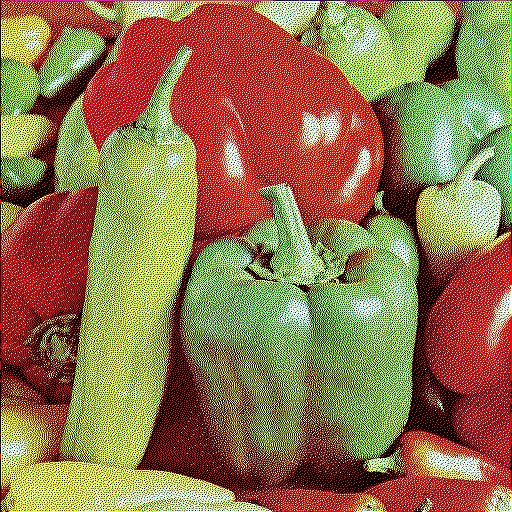

In [361]:
import IPython.display
import PIL.Image
PIL.Image.fromarray(oimg)

In [ ]:
import IPython.display
import PIL.Image
PIL.Image.fromarray(new_R)